<a href="https://colab.research.google.com/github/mia1996/rlcard-tutoirial/blob/master/leduc_holdem_cfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Training CFR on Leduc Hold'em**
In this tutorial, we will showcase a more advanced algorithm CFR, which uses `step` and `step_back` to traverse the game tree.

First, we install RLcard and PyTorch.

In [1]:
!pip install 'rlcard[torch]'

  Using cached rlcard-1.2.0.tar.gz (269 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for termcolor from https://files.pythonhosted.org/packages/d9/5f/8c716e47b3a50cbd7c146f45881e11d9414def768b7cd9c5e6650ec2a80a/termcolor-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/ad/08/c5e41eb22323db4a52260607598a207a2e1918916ae8201aa7a8ae005fcd/torch-2.3.0-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for GitPython from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc457c723931fed3f/GitPython-3.1.43-py3-none-any.whl.metadata
  Obtaining dependency information for gitdb2 from https://files.pythonhosted.org/packages/52/7e/59f96b47f671b3fe0aa0c1b609531a540434b719a10c417581e25b383909/gitdb2-4.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for gitdb>=4.0.1 from https://files.pythonhosted.org/packages/fd/

Then we import all the classes and functions we need.

In [1]:
import rlcard
from rlcard.agents import (
    DQNAgent,
    RandomAgent,
)
from rlcard.utils import (
    tournament,
    Logger,
    plot_curve,
)

We make two environments, where one allows `step_back` so that CFR can traverse the tree, and the other for evaluation only.

In [2]:
env = rlcard.make(
        'limit-holdem',
        config={
            'allow_step_back': True,
        }
    )
eval_env = rlcard.make(
    'limit-holdem',
)

We create the CFR agent.

In [10]:
agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[64,64],
    save_path="experiments/dqn/dqn_model")

Here, we save the trained model in the path `experiments/leduc_holdem_cfr_result/cfr_model`. Then we use a random agent as the opponent.

In [17]:
env.set_agents([agent, RandomAgent(num_actions=env.num_actions),])

In [18]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)
    

Now we start training for `1000` iterations, i.e., 1000 games.

In [19]:
with Logger("experiments/limit_holdem_cfr_result") as logger:
    for episode in range(1000):
        trajectories, payoffs = env.run(is_training=True)
        trajectories = reorganize(trajectories, payoffs)
        for ts in trajectories[0]:
            agent.feed(ts)
        # agent.train()
        print('\rIteration {}'.format(episode), end='')
        # Evaluate the performance. Play with Random agents.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    eval_env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path

Iteration 0
----------------------------------------
  episode      |  6
  reward       |  0.9845
----------------------------------------
Iteration 50
----------------------------------------
  episode      |  171
  reward       |  0.99095
----------------------------------------
INFO - Step 100, rl-loss: 3.0002665519714355
INFO - Copied model parameters to target network.
Iteration 10066, rl-loss: 2.3389799594879157
----------------------------------------
  episode      |  331
  reward       |  0.4182
----------------------------------------
Iteration 15038, rl-loss: 3.3335738182067872
----------------------------------------
  episode      |  478
  reward       |  0.4448
----------------------------------------
Iteration 20022, rl-loss: 3.5135962963104256
----------------------------------------
  episode      |  649
  reward       |  0.5594
----------------------------------------
Iteration 25001, rl-loss: 5.0693311691284181
----------------------------------------
  episode      

We can plot the learning curve

AttributeError: 'DQNAgent' object has no attribute 'save'

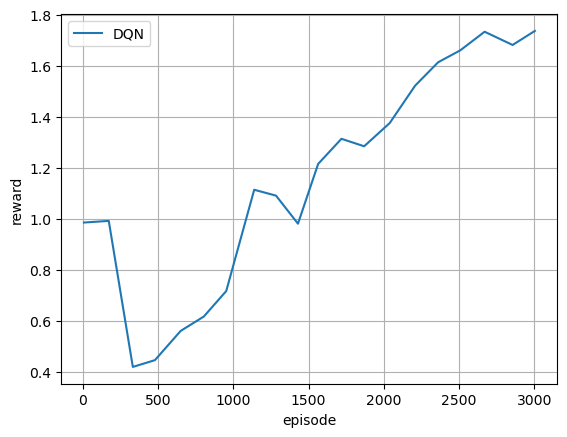

In [21]:
plot_curve(csv_path, fig_path, 'DQN')
agent.save()

Good job! Now you have your trained CFR agent on Leduc Hold'em!